In [ ]:
# Import matplotlib library 
import matplotlib.pyplot as plt 

# Import scikit-learn library 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

import numpy as np 


In [ ]:
# this command will download the LFW_people's dataset to hard disk. 
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 1) 

# introspect the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
print(h, w)
# Instead of providing 2D data, X has data already in the form of a vector that 
# is required in this approach. 
X = lfw_people.data 
n_features = X.shape[1] 
print(X.shape)
# the label to predict is the id of the person 
y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 

# Print Details about dataset 
print("Number of Data Samples: % d" % n_samples) 
print("Size of a data sample: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes) 


125 94
(1288, 11750)
Number of Data Samples:  1288
Size of a data sample:  11750
Number of Class Labels:  7


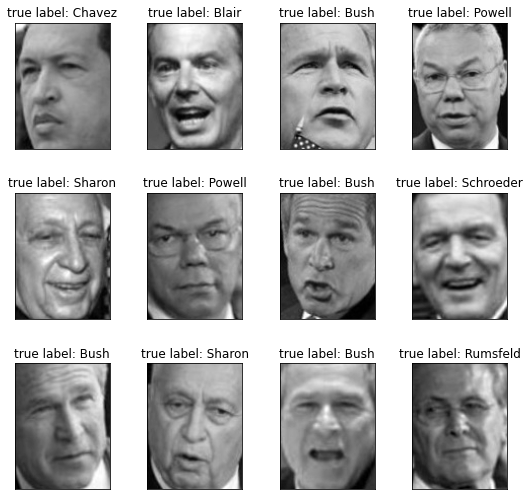

In [ ]:
# Function to plot images in 3 * 4 
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
	plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
	plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
	for i in range(n_row * n_col): 
		plt.subplot(n_row, n_col, i + 1) 
		plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
		plt.title(titles[i], size = 12) 
		plt.xticks(()) 
		plt.yticks(()) 

# Generate true labels above the images 
def true_title(Y, target_names, i): 
	true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
	return 'true label: % s' % (true_name) 

true_titles = [true_title(y, target_names, i) 
					for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 


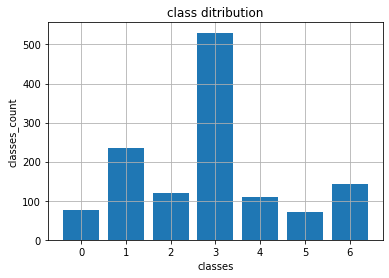

In [ ]:
from collections import Counter 
y_count = Counter(y)
plt.grid()
plt.bar(y_count.keys(),y_count.values())
plt.xlabel('classes')
plt.ylabel('classes_count')
plt.title('class ditribution')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
	X, y, test_size = 0.25, random_state = 42,stratify = y) 
print("size of training Data is % d and Testing Data is % d" %( 
		y_train.shape[0], y_test.shape[0])) 

size of training Data is  966 and Testing Data is  322


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
z = compute_class_weight('balanced',np.unique(y_train),y_train)

In [ ]:
weight = dict(zip(range(len(z)),iter(z)))

In [ ]:
print(weight)

{0: 2.3793103448275863, 1: 0.7796610169491526, 2: 1.5164835164835164, 3: 0.34760705289672544, 4: 1.6829268292682926, 5: 2.6037735849056602, 6: 1.2777777777777777}


In [ ]:
import time
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import TruncatedSVD
n_components = 150

t0 = time.time() 
pca = PCA(n_components = n_components, svd_solver ='randomized', 
		whiten = True).fit(X_train)
print("done in % 0.3fs" % (time.time() - t0)) 

eigenfaces = pca.components_.reshape((n_components, h, w)) 

print("Projecting the input data on the eigenfaces orthonormal basis") 
t0 = time.time() 
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test) 
print("done in % 0.3fs" % (time.time() - t0)) 
print(pca.explained_variance_ratio_)
#print(sum(pca.explained_variance_)/len(pca.explained_variance_))

done in  1.421s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.122s
[0.16964023 0.14000532 0.06604511 0.05684024 0.04753252 0.0308888
 0.02428189 0.02071771 0.01986707 0.01878297 0.01569217 0.01479423
 0.01240601 0.0103828  0.01022538 0.00961214 0.00909165 0.00889664
 0.00781564 0.00703039 0.00666293 0.00656352 0.0060385  0.00594587
 0.00558279 0.00546603 0.00513755 0.00474924 0.00454827 0.00435856
 0.0040969  0.00393039 0.00388217 0.00373423 0.00362712 0.00353758
 0.00336022 0.00326368 0.00308599 0.00301469 0.00296959 0.00285346
 0.00276909 0.00275812 0.00261973 0.00255228 0.00252761 0.00243678
 0.00234979 0.00227286 0.00221666 0.00219941 0.00216125 0.00212449
 0.00206708 0.00203948 0.00201105 0.0019699  0.00190628 0.00186925
 0.00185131 0.00176955 0.00174065 0.00168294 0.00167965 0.00166402
 0.00162103 0.00157385 0.00155045 0.00153565 0.00151633 0.00147181
 0.00145097 0.00143224 0.00140788 0.00138567 0.00137015 0.00132827
 0.00130876 0.00130119 0.00128259 0.

### plotting eigen faces

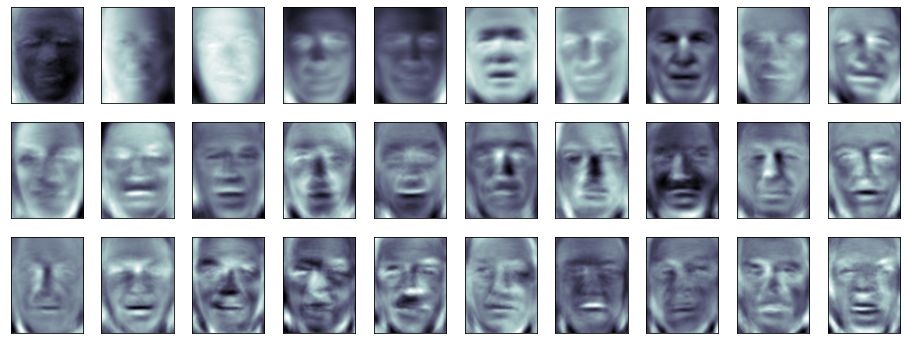

In [ ]:
#plotting eigen faces
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((h, w)),
              cmap=plt.cm.bone)

### percentage variance/information retained v/s features

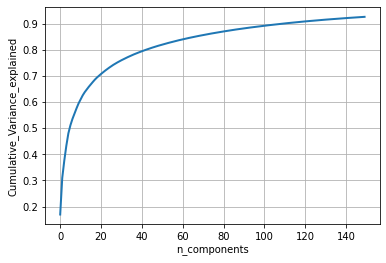

In [ ]:
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [ ]:
print("Sample Data point after applying PCA\n", X_train_pca[0]) 
print("-----------------------------------------------------") 
print("Dimesnsions of training set = % s and Test Set = % s"%( 
		X_train_pca.shape, X_test_pca.shape)) 


Sample Data point after applying PCA
 [-0.36761132  0.10872304 -0.45884588  0.9195957  -0.30699435  0.48959076
 -0.73947775  0.8418712   0.537294    0.6195563  -0.2952375  -0.00643605
  0.10292564  0.43188304  1.8517928  -0.6455543  -0.84844846 -1.6237634
  1.2581339   0.04982973  0.21203293  0.5367653  -0.32281554  0.6243142
  0.9578001   0.9403044  -0.57246643  0.5197143  -0.49127066 -0.9315577
 -0.40166828 -0.02611482 -0.44133794  1.802129   -0.3225395   0.34926027
 -2.1499486  -0.08723404  0.75289    -1.4805775   0.9166254   0.05409494
 -0.6681592  -1.8397824  -0.18756725  3.3921232  -0.9751217  -0.56758934
 -0.12408391  0.12892573 -0.09888193  0.3086043  -1.7714003   0.86149365
  0.5049992  -0.4612795   2.673454   -0.71606255 -0.7515373   0.7837697
 -0.58210987 -0.59479475  0.4461933  -0.14701983  1.2190344  -0.03205881
  0.8751742   0.46277708 -1.4958969   0.8206945  -1.4834359   0.42484364
 -0.67691225 -0.16182148 -1.0230407   0.3583249  -0.09347437 -0.09704189
  2.550909    1.3

In [ ]:
import time
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import TruncatedSVD
n_components = 150
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html
t0 = time.time() 
lle = LocallyLinearEmbedding(n_components=n_components,n_neighbors=80,n_jobs=-1).fit(X_train)
print("done in % 0.3fs" % (time.time() - t0)) 
#eigenfaces = pca.components_.reshape((n_components, h, w)) 
print("Projecting the input data on the eigenfaces orthonormal basis") 
t0 = time.time() 
X_train_lle = lle.transform(X_train) 
X_test_lle = lle.transform(X_test) 
print("done in % 0.3fs" % (time.time() - t0)) 
print(lle.reconstruction_error_)

done in  30.034s
Projecting the input data on the eigenfaces orthonormal basis
done in  37.470s
16.425288953192265


In [ ]:
'''''print("Fitting the classifier to the training set") 
t0 = time.time() 
#0.001,0.01,0.1,1,10,
param_grid = {'C': [0.001,0.01,0.1,1,10,1e3, 5e3, 1e4], 
			'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } 
clf = GridSearchCV( 
	SVC(kernel ='rbf', class_weight ='balanced'), param_grid 
,verbose = 1,n_jobs = -1,scoring = 'accuracy') 
clf = clf.fit(X_train_lle, y_train) 
print("done in % 0.3fs" % (time.time() - t0)) 
print("Best estimator found by grid search:") 
print(clf.best_estimator_) 
print("Predicting people's names on the test set") 
t0 = time.time() 
y_pred = clf.predict(X_test_lle) 
print("done in % 0.3fs" % (time.time() - t0)) 
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) '''''

'\'\'print("Fitting the classifier to the training set") \nt0 = time.time() \n#0.001,0.01,0.1,1,10,\nparam_grid = {\'C\': [0.001,0.01,0.1,1,10,1e3, 5e3, 1e4], \n\t\t\t\'gamma\': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } \nclf = GridSearchCV( \n\tSVC(kernel =\'rbf\', class_weight =\'balanced\'), param_grid \n,verbose = 1,n_jobs = -1,scoring = \'accuracy\') \nclf = clf.fit(X_train_lle, y_train) \nprint("done in % 0.3fs" % (time.time() - t0)) \nprint("Best estimator found by grid search:") \nprint(clf.best_estimator_) \nprint("Predicting people\'s names on the test set") \nt0 = time.time() \ny_pred = clf.predict(X_test_lle) \nprint("done in % 0.3fs" % (time.time() - t0)) \n# print classifiction results \nprint(classification_report(y_test, y_pred, target_names = target_names)) \n# print confusion matrix \nprint("Confusion Matrix is:") \nprint(confusion_matrix(y_test, y_pred, labels = range(n_classes))) '

In [ ]:
import tensorflow as tf
y_train =tf.keras.utils.to_categorical(y_train,num_classes=len(np.unique(y))) 
y_test =tf.keras.utils.to_categorical(y_test,num_classes=len(np.unique(y)))

In [ ]:
lfw_people.images.shape
X_train = X_train.reshape(-1,lfw_people.images.shape[1],lfw_people.images.shape[2])
X_test = X_test.reshape(-1,lfw_people.images.shape[1],lfw_people.images.shape[2])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(966, 125, 94)
(322, 125, 94)
(966, 7)


In [ ]:
'''''import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D,Concatenate,Input,MaxPooling2D,Flatten,BatchNormalization,Dropout
seed=2
np.random.seed(seed)
tf.random.set_seed(seed)
input0 = Input(shape = (50,37,1))
input1 = Input(shape = (150,))
input2 = Input(shape = (150,))

# model= tf.keras.applications.VGG16(
#     include_top=False,
#     weights=None,
#     input_shape=(50,37,1),
#     pooling=max)

x = Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',kernel_regularizer='L2')(input0)
x = MaxPooling2D(pool_size=(1,1))(x)
x = Dropout(.4)(x)

# x = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(x)
# x = MaxPooling2D(pool_size=(1,1)) (x)
# x = Dropout(.3)(x)


x = Conv2D(8, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',kernel_regularizer='L2')(x)
x = MaxPooling2D(pool_size=(1,1)) (x)
x = Dropout(.4)(x)
x = Flatten()(x)
x = Dropout(.4)(x)
x = Concatenate(axis=-1)([x,input1,input2])
x = Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),kernel_regularizer='L2')(x) 
x = BatchNormalization()(x)
x = Dropout(.4)(x)
# x = Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)
# x = BatchNormalization()(x)
# 
preds=Dense(10,activation='softmax')(x)

model=Model(inputs=(input1,input2,input0),outputs=preds)
model.summary()'''''

"''import tensorflow as tf\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Dense,Conv2D,Concatenate,Input,MaxPooling2D,Flatten,BatchNormalization,Dropout\nseed=2\nnp.random.seed(seed)\ntf.random.set_seed(seed)\ninput0 = Input(shape = (50,37,1))\ninput1 = Input(shape = (150,))\ninput2 = Input(shape = (150,))\n\n# model= tf.keras.applications.VGG16(\n#     include_top=False,\n#     weights=None,\n#     input_shape=(50,37,1),\n#     pooling=max)\n\nx = Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',kernel_regularizer='L2')(input0)\nx = MaxPooling2D(pool_size=(1,1))(x)\nx = Dropout(.4)(x)\n\n# x = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(x)\n# x = MaxPooling2D(pool_size=(1,1)) (x)\n# x = Dropout(.3)(x)\n\n\nx = Conv2D(8, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',kernel_regularizer='L2')(x)\nx = MaxPooling2D(pool_size=(1,1)) (x)\nx = Dropout(.4)(x)\nx = Flatten

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,Concatenate,Input,MaxPooling2D,Flatten,BatchNormalization,Dropout
seed=2
np.random.seed(seed)
tf.random.set_seed(seed)
input0 = Input(shape = (lfw_people.images.shape[1],lfw_people.images.shape[1],1))
input1 = Input(shape = (150,))
input2 = Input(shape = (150,))

model= tf.keras.applications.VGG16(
     include_top=False,
     weights=None,
     input_shape=(lfw_people.images.shape[1],lfw_people.images.shape[2],1),
     pooling=max)

#adding dropouts after each pooling layer to overrcome overfitting
updated_model = Sequential()
for layer in model.layers:
    updated_model.add(layer)
    if layer.name in ['block1_pool', 'block2_pool','block3_pool','block4_pool' ]:
        print(layer.name)
        updated_model.add(Dropout(.3))

model = updated_model
'''''
x = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',kernel_regularizer='L2')(input0)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(.2)(x)

x = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(.2)(x)


x = Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',kernel_regularizer='L2')(x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(.2)(x)'''''
x = Flatten()(model.output)
x = Dropout(.4)(x)
x = Concatenate(axis=-1)([x,input1,input2])
x = Dense(units=512,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),kernel_regularizer=None)(x) 
#x = BatchNormalization()(x)
x = Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)
x = Dropout(.4)(x)
x = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)
x = BatchNormalization()(x)
x = Dropout(.4)(x)

x = Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)

preds=Dense(len(np.unique(y)),activation='softmax')(x)

model=Model(inputs=(input1,input2,model.input),outputs=preds)
model.summary()

block1_pool
block2_pool
block3_pool
block4_pool
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 125, 94, 1)] 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 125, 94, 64)  640         input_24[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 125, 94, 64)  36928       block1_conv1[1][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 62, 47, 64)   0           block1_conv2[1][0]               
____________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow_addons as tfa
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
np.random.seed(seed)
tf.random.set_seed(seed)
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy',tfa.metrics.F1Score(num_classes=len(np.unique(y)), threshold=0.5,average = 'micro')])
def scheduler(epoch, lr):
  if epoch > 350:
    return lr* 0.01
  else:
    return lr 
    
monitor = EarlyStopping(monitor='f1_score', min_delta=0.0001, patience=500, 
                        verbose=1, mode='max', restore_best_weights=False,baseline=0.910)
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', factor=0.01, mode='max',
                              patience=300, min_lr=0.000001,verbose=1)
schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback =[monitor,reduce_lr,schedule]

In [ ]:
#tf.keras.utils.plot_model(model)

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)
history = model.fit((X_train_pca,X_train_lle,X_train),y_train,batch_size=64,epochs=400,
                    validation_data=((X_test_pca,X_test_lle,X_test),y_test),callbacks = callback,class_weight=weight)

Epoch 1/400
16/16 [==============================] - 4s 234ms/step - loss: 0.0263 - accuracy: 0.9969 - f1_score: 0.9964 - val_loss: 0.5805 - val_accuracy: 0.8478 - val_f1_score: 0.8531
Epoch 2/400
16/16 [==============================] - 4s 228ms/step - loss: 0.0268 - accuracy: 0.9979 - f1_score: 0.9974 - val_loss: 0.5804 - val_accuracy: 0.8447 - val_f1_score: 0.8531
Epoch 3/400
16/16 [==============================] - 4s 230ms/step - loss: 0.0316 - accuracy: 0.9979 - f1_score: 0.9979 - val_loss: 0.5800 - val_accuracy: 0.8447 - val_f1_score: 0.8544
Epoch 4/400
16/16 [==============================] - 4s 231ms/step - loss: 0.0337 - accuracy: 0.9928 - f1_score: 0.9938 - val_loss: 0.5802 - val_accuracy: 0.8447 - val_f1_score: 0.8544
Epoch 5/400
16/16 [==============================] - 4s 230ms/step - loss: 0.0334 - accuracy: 0.9959 - f1_score: 0.9964 - val_loss: 0.5801 - val_accuracy: 0.8447 - val_f1_score: 0.8544
Epoch 6/400
16/16 [==============================] - 4s 229ms/step - loss: 

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score', 'lr'])


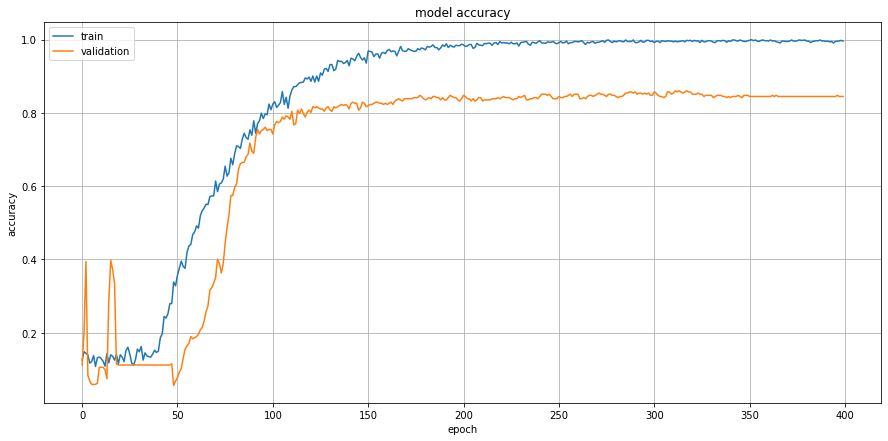

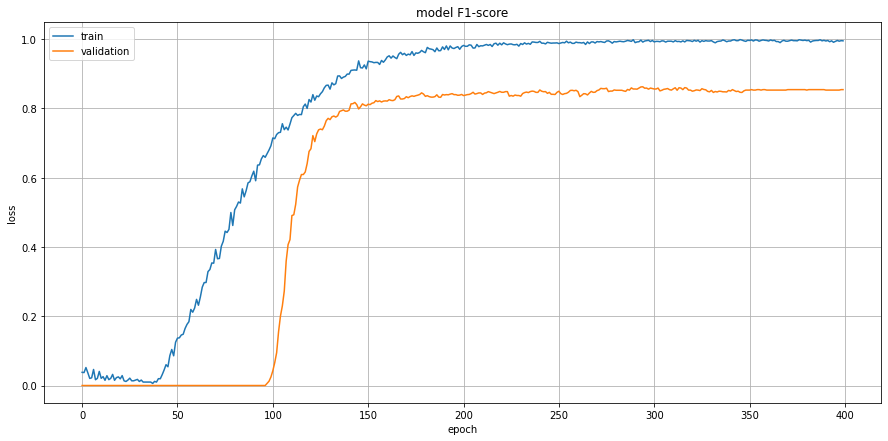

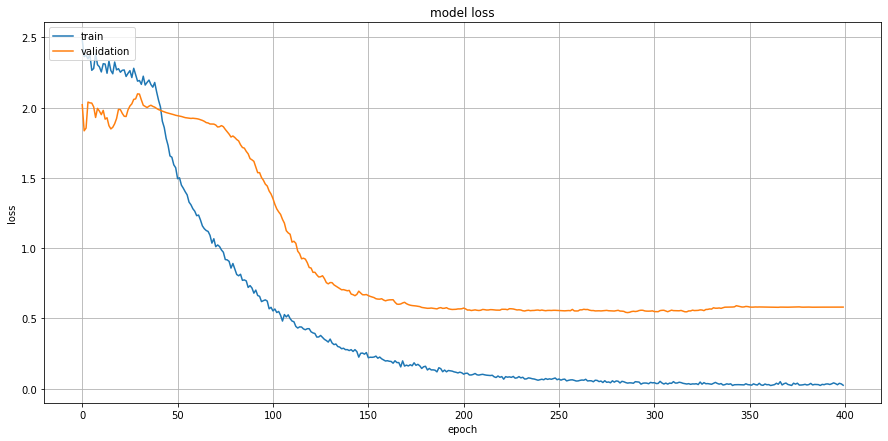

In [ ]:
plt.figure(figsize = (15,7))
print(history.history.keys())
#  "Accuracy"
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
plt.savefig('accuracy')

# "f1"
plt.figure(figsize = (15,7))
plt.grid()
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model F1-score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.grid()
#plt.show()
plt.savefig('f1.png')
# "Loss"

plt.figure(figsize = (15,7))
plt.grid()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.grid()
#plt.show()
plt.savefig('loss')
